In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("New Dataframe.csv")

# Define features (X) and target variable (y)
X = data.drop("Target", axis=1)  # Replace 'Target' with the actual target column name
y = data["Target"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 = 0.15

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions for validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
r2_val, medae_val, mae_val, rmse_val = evaluate_model(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("Validation Set Metrics:")
print(f"R²: {r2_val}, MedAE: {medae_val}, MAE: {mae_val}, RMSE: {rmse_val}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}\n")

# Test set evaluation
r2_test, medae_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred)
print("Test Set Metrics:")
print(f"R²: {r2_test}, MedAE: {medae_test}, MAE: {mae_test}, RMSE: {rmse_test}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Validation Set Metrics:
R²: 0.67, MedAE: 2.47, MAE: 37.45, RMSE: 120.13
Std Dev: 215.35, Avg: 181.46, Min: -0.43, Max: 547.07

Test Set Metrics:
R²: 0.67, MedAE: 7.3, MAE: 56.38, RMSE: 126.05
Std Dev: 205.42, Avg: 220.27, Min: -0.25, Max: 511.75


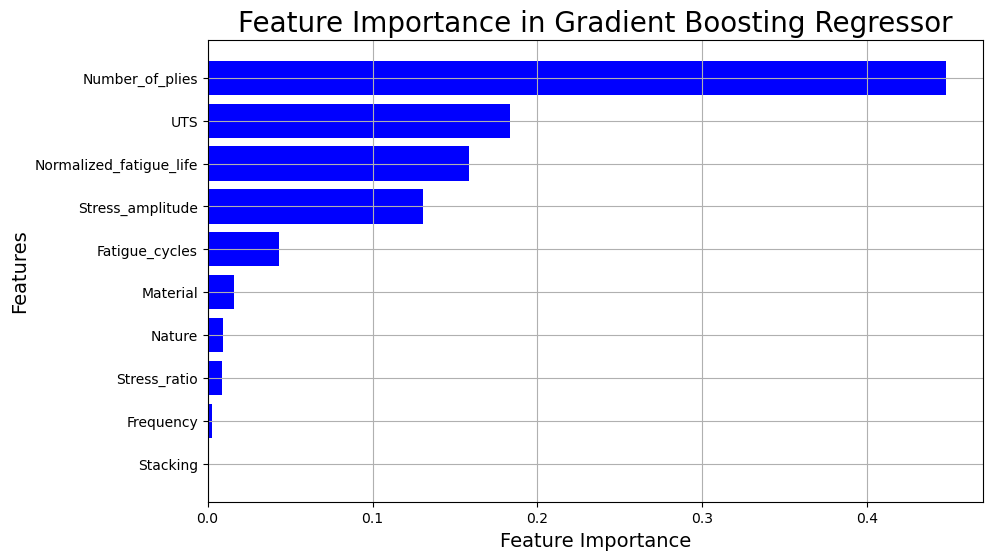

In [ ]:
# Extract feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe for the feature importances and sort in ascending order
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="blue")
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in Gradient Boosting Regressor", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('GBR.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping))

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("New Dataframe.csv")

# Define features (X) and target variable (y)
X = data.drop("Target", axis=1)  # Replace 'Target' with the actual target column name
y = data["Target"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 = 0.15

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize GradientBoostingRegressor with GridSearchCV (5-fold)
model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Get best model and its parameters
GB_GS = grid_search.best_estimator_
best_params = grid_search.best_params_
r2_cv = round(grid_search.best_score_, 2)

print("Best parameters:", best_params)
print("Cross-Validation R²:", r2_cv)

# Predictions for validation and test sets
y_val_pred = GB_GS.predict(X_val)
y_test_pred_gs = GB_GS.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
r2_val, medae_val, mae_val, rmse_val = evaluate_model(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("\nValidation Set Metrics:")
print(f"R²: {r2_val}, MedAE: {medae_val}, MAE: {mae_val}, RMSE: {rmse_val}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}")

# Test set evaluation
r2_test, medae_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred_gs)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred_gs)
print("\nTest Set Metrics:")
print(f"R²: {r2_test}, MedAE: {medae_test}, MAE: {mae_test}, RMSE: {rmse_test}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Cross-Validation R²: 0.93

Validation Set Metrics:
R²: 0.77, MedAE: 0.2, MAE: 30.95, RMSE: 100.9
Std Dev: 208.19, Avg: 175.24, Min: -0.2, Max: 527.73

Test Set Metrics:
R²: 0.87, MedAE: 6.92, MAE: 32.28, RMSE: 80.18
Std Dev: 205.49, Avg: 223.52, Min: -0.07, Max: 506.01


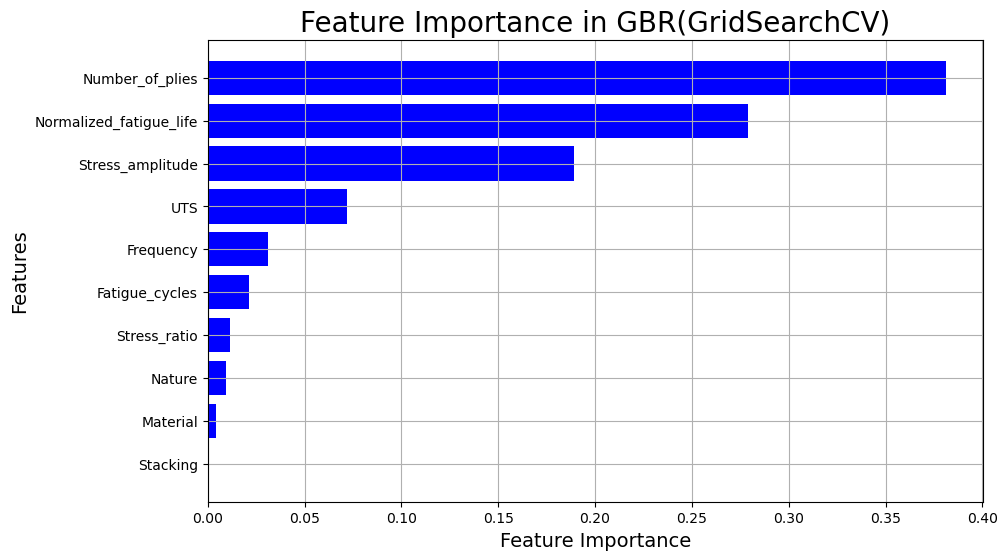

In [ ]:
# Extract feature importances from the best model
feature_importances = GB_GS.feature_importances_
feature_names = X.columns

# Create a dataframe for the feature importances and sort in ascending order
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="blue")
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in GBR(GridSearchCV)", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('GBR GS.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

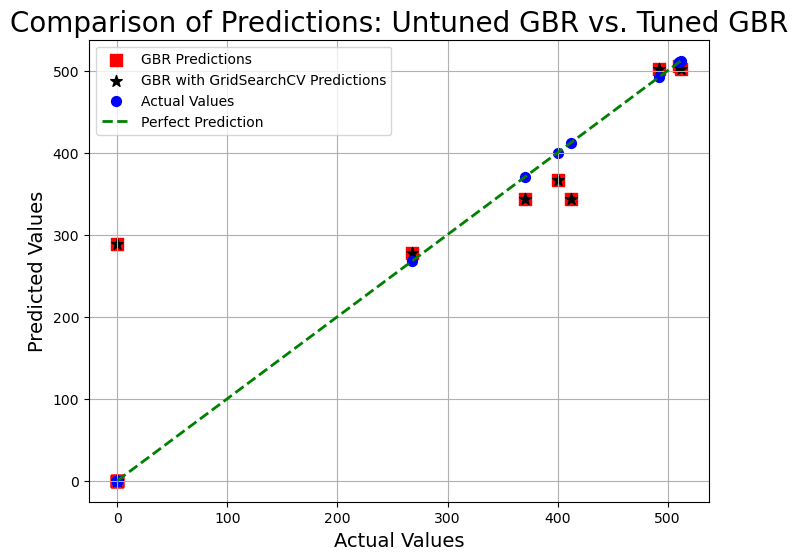

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot to compare predictions
plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values for the untuned model
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label='GBR Predictions')

# Plot the actual vs predicted values for the tuned model
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label='GBR with GridSearchCV Predictions')

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Add a diagonal line representing perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Comparison of Predictions: Untuned GBR vs. Tuned GBR', fontsize=20)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('GBR vs GBR with gridserach.tiff')

# Show the plot
plt.show()